In [1]:
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import operator
import math
import community
from collections import Counter
import itertools
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
#first part was retrieving the data which is ouputted as csv files containg
#course information for each course within each department
#next part is about creating a network of all the courses
#firstly the csv files containing the data are loaded into python
#overview of csv files content:
#checkout assignment 2 for some network analysis 

#COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE

rootdir='C:/Users/SIR-B/Desktop/New folder'
list_of_df_for_each_department=[]
for filename in os.listdir(rootdir):
    if filename.endswith('.csv'):
        #print filename
        df=pd.read_csv(filename)
        list_of_df_for_each_department.append(df)

In [227]:
dirroot='C:/Users/SIR-B/Desktop/New folder'
list_of_departments=[]
for filename in os.listdir(dirroot):
    if filename.endswith('.csv'):
        #print filename
        df=pd.read_csv(filename)
        list_of_departments.append(df)

In [2]:
dirroot='C:/Users/SIR-B/Desktop/New folder'
con_dic = {k: [] for k in [a for a in os.listdir(dirroot) if a.endswith('.csv')]}
stop_words = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
for filename in con_dic:
    con_dic[filename] = pd.read_csv(dirroot+'/'+filename,dtype=object).dropna(how='all')
    con_dic[filename] = con_dic[filename]['CONTENT'].tolist()
    con_dic[filename] = [nltk.word_tokenize(re.sub('[^A-Za-z]+',' ', wds.decode('utf-8').lower())) for wds in con_dic[filename]]
    con_dic[filename] = [' '.join(list((set(smart)-set(stop_words)-set(['course'])))) for smart in con_dic[filename]]
    #con_dic[filename] = [' '.join([stemmer.stem(st) for st in item]) for item in con_dic[filename]]
    #con_dic[filename] = dict(enumerate(con_dic[filename],1))

In [3]:
new_condic = {}
vect = {}
#vectorizer = TfidfVectorizer(stop_words='english',decode_error='ignore',
                             #strip_accents='unicode',smooth_idf=True,max_df=0.9,use_idf=True)
for depts in con_dic:
    vect[depts] = TfidfVectorizer(stop_words='english',decode_error='ignore', 
                                 strip_accents='unicode',smooth_idf=True,max_df=0.9,use_idf=True)
    new_condic[depts] = vect[depts].fit_transform(con_dic[depts])
    #new_condic[depts] = new_condic[depts].todense().tolist()

In [4]:
lll = {k: '' for k in [a for a in os.listdir(dirroot) if a.endswith('.csv')]}
kkk = {k: [] for k in [a for a in os.listdir(dirroot) if a.endswith('.csv')]}
for dep in new_condic:
    for p in range(len(new_condic[dep].todense().tolist())):
        kkk[dep].extend(zip(vect[dep].get_feature_names(),new_condic[dep].todense().tolist()[p]))
    kkk[dep] = [(i,j+0.999) for i,j in list(set(kkk[dep])) if j!=0]
    for t,c in kkk[dep]:
        lll[dep] = lll[dep]+(t+' ')*int(round(c))

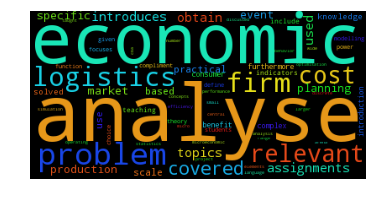

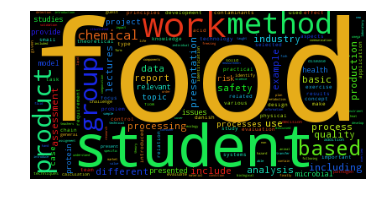

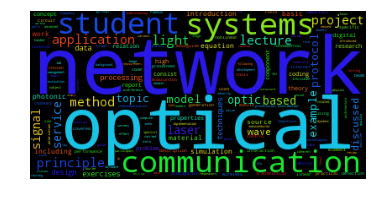

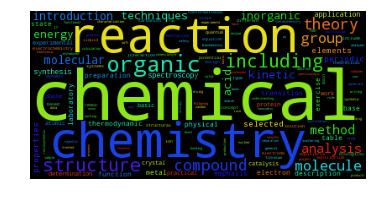

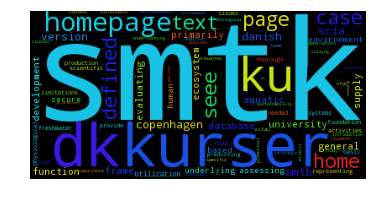

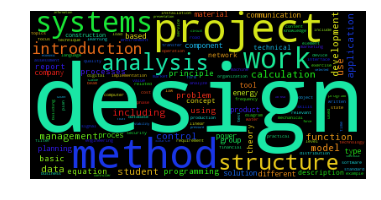

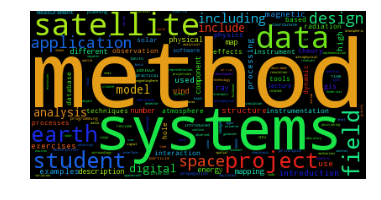

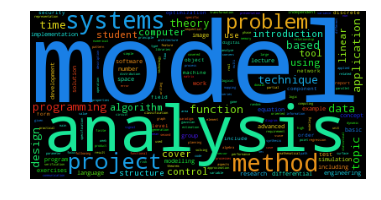

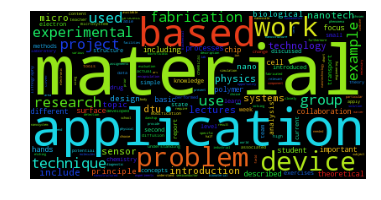

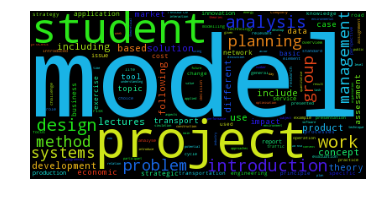

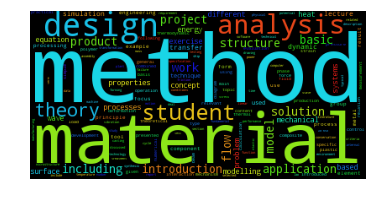

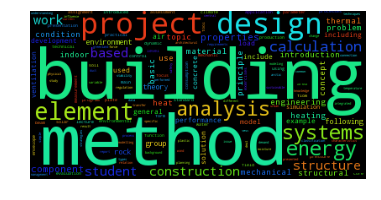

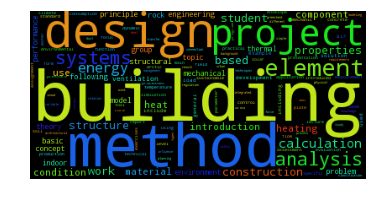

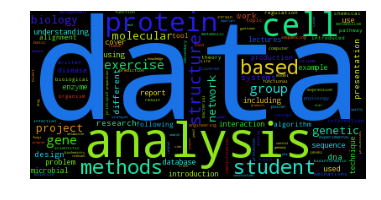

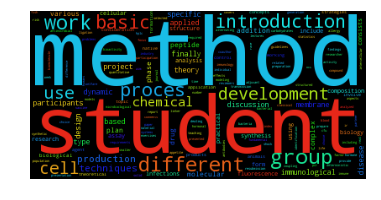

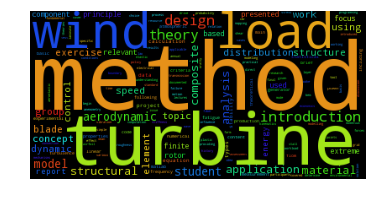

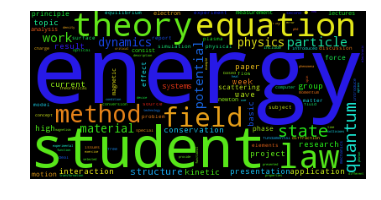

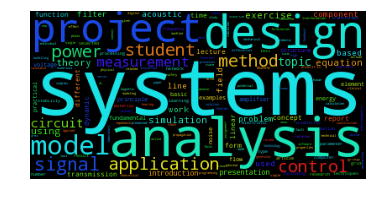

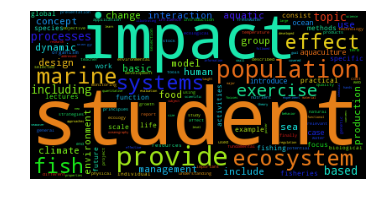

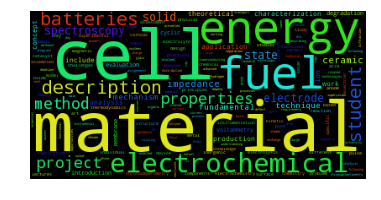

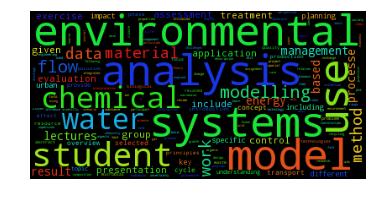

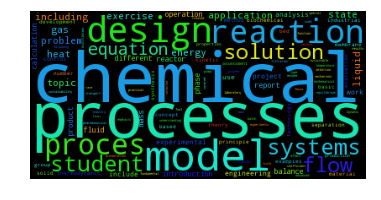

In [5]:
for dpts in lll:
    wordcloud = WordCloud().generate(lll[dpts])
    img=plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

These wordclouds are interestting indicators for what is weighted more in each department. This can be useful for student who are not sure of which education they want or which department of education they mostly relate too. Having a list (or a visual stimulating cloud) of terms can help narrow down that search e.g. a studen who wants his education to weight on economy could search for department wordcloud that majorily (size-wise) contain the word "economy"(or similar) and finds his/her education within it.

In [4]:
dirroot='C:/Users/DRC/Desktop/social_csv_folder'

teach_dic = {k: [] for k in [a for a in os.listdir(dirroot) if a.endswith('.csv')]}
course_responsible = {}
for filename in con_dic:
    teach_dic[filename] = pd.read_csv(dirroot+'/'+filename,dtype=object).dropna(how='all')
    #con_dic[filename] = con_dic[filename]['CONTENT'].tolist()
    #con_dic[filename] = [nltk.word_tokenize(re.sub('[^A-Za-z]+',' ', wds.decode('utf-8').lower())) for wds in con_dic[filename]]
    #con_dic[filename] = [' '.join(list((set(smart)-set(stop_words)-set(['course'])))) for smart in con_dic[filename]]
    #con_dic[filename] = [' '.join([stemmer.stem(st) for st in item]) for item in con_dic[filename]]
    #con_dic[filename] = dict(enumerate(con_dic[filename],1))
for index, row in teach_dic['Department-of-Applied-Mathematics-and-Computer-Science.csv'].iterrows():
    rw = re.sub('\s+', ' ',row['COURSE RESPONSIBLE'])
    for tech in [y.strip() for y in rw.split(',')]:
        try:
            course_responsible[tech].extend(row['COURSE NUMBER'].split())
        except:
            course_responsible[tech] = [row['COURSE NUMBER']]
    #for tech in row:
    #    course_responsible.append(tech)
Y = nx.Graph()
Y.add_nodes_from(course_responsible.keys())
##############################################
course_2 = dict(course_responsible)
for k in course_responsible.keys():
    for l in course_2.keys():
        if k!=l:
            if len(set(course_responsible[k])&set(course_2[l]))>=1:
                Y.add_edge(k,l)
nx.draw(Y)
nx.write_graphml(Y, "tt.graphml")
Y.edges()

NameError: name 'con_dic' is not defined

In [235]:
#merging all the departments into one dataframe
merged_df=pd.concat([list_of_departments[0],list_of_departments[1],list_of_departments[2],list_of_departments[3],list_of_departments[4],list_of_departments[5],list_of_departments[6],list_of_departments[7],list_of_departments[8],list_of_departments[9],list_of_departments[10],list_of_departments[11],list_of_departments[12],list_of_departments[13],list_of_departments[14],list_of_departments[15],list_of_departments[16],list_of_departments[17],list_of_departments[18],list_of_departments[19],list_of_departments[20]])

In [236]:
merged = merged_df.dropna(thresh=11)

In [78]:
ss = pd.read_csv(dirroot+'/Department of Physics.csv')
ss

COURSE NUMBER                                        COURSE NAME  \
0              NaN                                                NaN   
1          10018.0                                          Physics 1   
2              NaN                                                NaN   
3          10020.0                                          Physics 1   
4              NaN                                                NaN   
5          10022.0                                          Physics 1   
6              NaN                                                NaN   
7          10024.0                                          Physics 1   
8              NaN                                                NaN   
9          10031.0         Introduction to Physics and Nanotechnology   
10             NaN                                                NaN   
11         10033.0                    Mechanics and Physical Modeling   
12             NaN                                                NaN   
13         10034.0             Thermodynamics and statistical physics   
14             NaN                                                NaN   
15         10036.0                    Electromagnetism for physicists   
16             NaN                                                NaN   
17         10041.0                                         Physics 2    
18             NaN                                                NaN   
19         10044.0                                          Physics 2   
20             NaN                                                NaN   
21         10050.0                                      Model Physics   
22             NaN                                                NaN   
23         10052.0                        Basic Physics and Chemistry   
24             NaN                                                NaN   
25         10054.0                                      Model Physics   
26             NaN                                                NaN   
27         10102.0                                  Quantum Mechanics   
28             NaN                                                NaN   
29         10103.0                         Quantum Mechanics revision   
..             ...                                                ...   
100            NaN                                                NaN   
101        10610.0                              History of Technology   
102            NaN                                                NaN   
103        10720.0                            Research Immersion BSc    
104            NaN                                                NaN   
105        10721.0                            Research Immersion BSc    
106            NaN                                                NaN   
107        10722.0                            Research Immersion BSc    
108            NaN                                                NaN   
109        10730.0                            Research Immersion MSc    
110            NaN                                                NaN   
111        10731.0                            Research Immersion MSc    
112            NaN                                                NaN   
113        10732.0                            Research Immersion MSc    
114            NaN                                                NaN   
115        10800.0   PhD Course in Energy Technologies for a Susta...   
116            NaN                                                NaN   
117        10811.0                  Introduction to Radiation Physics   
118            NaN                                                NaN   
119        10814.0                  Computational radiation dosimetry   
120            NaN                                                NaN   
121        10900.0                                 Physics 1 revision   
122            NaN                                             

In [238]:
list_contents = merged_df['CONTENT'].tolist()

In [239]:
list_contents

[nan,
 '\nThe course is an introduction to engineering work. What does an\nengineer do and how? Through practical examples from the world of\nengineering problem solving skills are exercised and various\nmethods and tools for scketching, drawing (CAD) and building\nmodelling (BIM) are essential elements. \n',
 nan,
 '\nBuilding components and usual design, design and construction\nprocesses, proposed provision of simple building layout incl. area\nuse, design of structural systems, building envelope and defining\nkey technical construction features, principles and routing.\n\nEstimates of building design and sizing of ductwork in simple\nventilation design and dimensioning of simple heating systems,\nperformance of CAD drawings and project presentation.\n\nIntegration of all partial solutions into a single, optimized\nproject. \n',
 nan,
 '\n- Injuries after a building fire\n\n- The fire regulations in Denmark\n\n- Performance based codes\n\n- Fire tests and classification\n\n- Basic f

In [240]:
#merging all the departments into one dataframe
merged_df=pd.concat([list_of_df_for_each_department[0],list_of_df_for_each_department[1],list_of_df_for_each_department[2],list_of_df_for_each_department[3],list_of_df_for_each_department[4],list_of_df_for_each_department[5],list_of_df_for_each_department[6],list_of_df_for_each_department[7],list_of_df_for_each_department[8],list_of_df_for_each_department[9],list_of_df_for_each_department[10],list_of_df_for_each_department[11],list_of_df_for_each_department[12],list_of_df_for_each_department[13],list_of_df_for_each_department[14],list_of_df_for_each_department[15],list_of_df_for_each_department[16],list_of_df_for_each_department[17],list_of_df_for_each_department[18],list_of_df_for_each_department[19],list_of_df_for_each_department[20]])

In [241]:
len(list_of_df_for_each_department)

22

In [242]:
list_of_nodes=merged_df['COURSE NUMBER'].tolist()

In [243]:
#we create a dict with course names and correponding course number
#since it will come in handy later
list_of_nodes_names=merged_df['COURSE NAME'].tolist()

In [244]:
course_dict={}
for i in range(0,len(list_of_nodes_names)):
    course_dict[list_of_nodes_names[i]]=list_of_nodes[i]

In [245]:
# now we list the links by using the prerequisites of each course
list_of_prerequistites=merged_df['RECOMMENDED PREREQUISITES'].tolist()

In [246]:
#list_of_prerequistites[:50]

In [247]:
#use list_of_nodes
#we create a dict that contain the nodes and its prerequisites
links_dict={}
for i in range(0,len(list_of_nodes)):
    links_dict[list_of_nodes[i]]=list_of_prerequistites[i]



In [248]:
#links_dict.items()[45]

In [249]:
#re.findall('\d+',links_dict.values()[45])

In [250]:
#the prerequistites (represented by course number) are in a string format, so it is neccessary to utilize a reqular expression to extract the course numbers in each "string" of course numbers (courses that are prerequisites) and list them in a pythong list numerical objcet
#this extraction code ignores and passes prerequisites that are nan or none values i.e. non-existent prerequisites (no outgoing links). 
new_dict_list_of_links={}
for k,v in links_dict.items():
    try:
        temp_list=re.findall('\d+',v)
        new_dict_list_of_links[k]=temp_list
    except TypeError:
        pass

In [259]:
#new_dict_list_of_links.items()[45]
nx.write_graphml(G, 'graph_text')

In [252]:
#new_dict_list_of_links[41078.0]

In [253]:
#for i in new_dict_list_of_links[41078.0]:
#    print i

In [254]:
#creating the graph using this dictionairy with nodes as keys and links as lists
G=nx.DiGraph(new_dict_list_of_links)
#nx.draw(G)

In [255]:
#number of_edges
len(G.edges())

2761

In [256]:
#number of nodes
len(G.nodes())

2328

In [257]:
#list of tuples
list_of_links=G.edges()

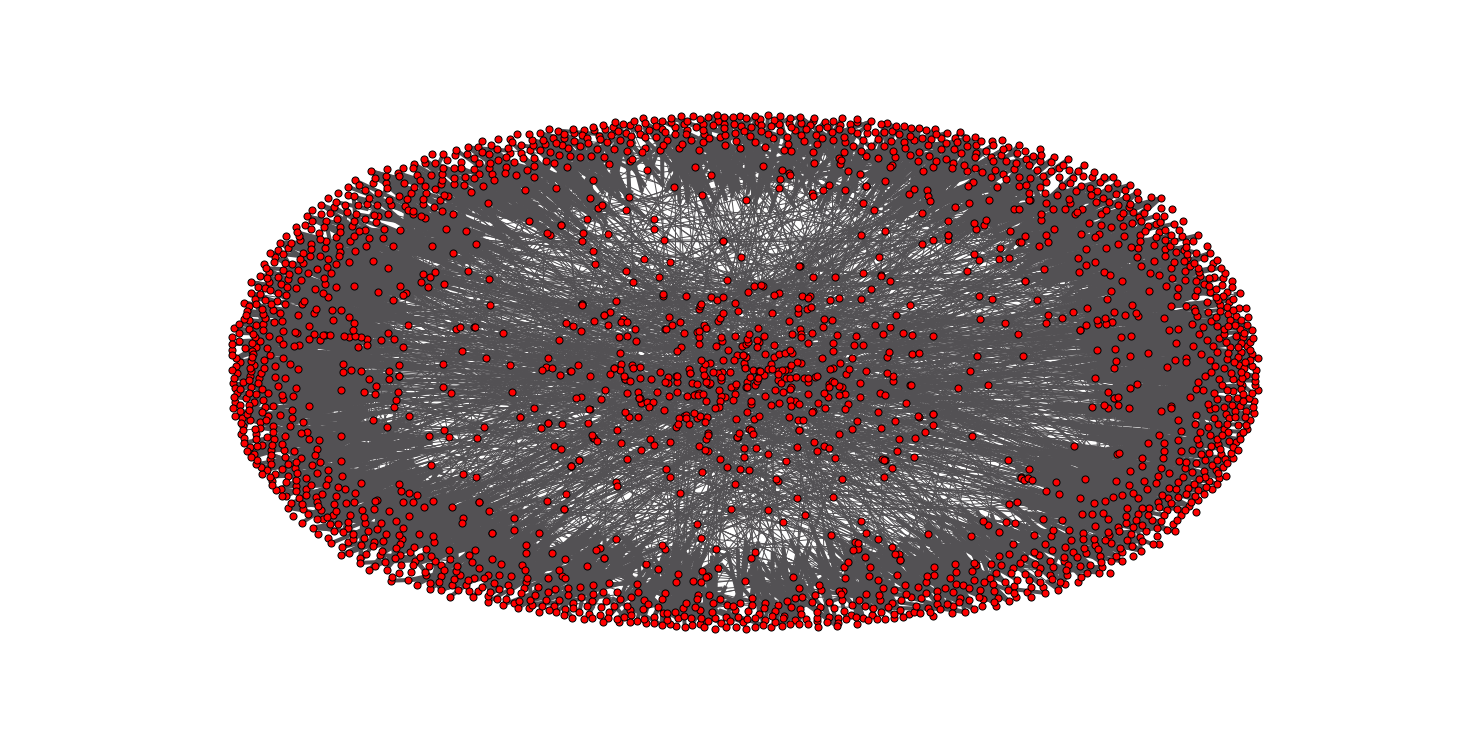

In [258]:
pos = pos=nx.spring_layout(G, scale=5)
plt.figure(num=None, figsize=(20, 10), dpi=1500)
nx.draw(G,pos, edge_color='#535154',node_size=50)
plt.show()

In [22]:
deg_cen=nx.degree_centrality(G)
in_deg_cen=nx.in_degree_centrality(G)
out_deg_cen=nx.degree_centrality(G)
between_cen=nx.betweenness_centrality(G)
edge_betw_cen=nx.edge_betweenness_centrality(G)
eigen_cen=nx.eigenvector_centrality(G)

In [23]:
WC=list(nx.weakly_connected_component_subgraphs(G))

In [24]:
largest = max(nx.weakly_connected_component_subgraphs(G),key=len)

In [25]:
#[len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [26]:
#largest_cc = max(nx.weakly_connected_components(G), key=len)

In [27]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)

In [28]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
betweenness_centrality_dict = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)


In [29]:
in_degrees=list(G.in_degree().values())
out_degrees=list(G.out_degree().values())
#degree values
degrees=list(G.degree().values())

In [30]:
#using  networkx to create the prober subgraph using the weakly connected component (WCC)
#generating corresponding undirected graph to the philosopher directed graph

G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
H = G.to_undirected()

In [31]:
#networkx function to get the assortativity
r = nx.degree_assortativity_coefficient(H)
print "Assortativity of the undirected graph: %s" %r

Assortativity of the undirected graph: -0.107208068947


In [32]:
#using the community package to calculate the modularity using the Louvain-algroithm
#for directed graphs the partition has to be set manually. in our case we can set it to represent the 21 departments
part = community.best_partition(H)


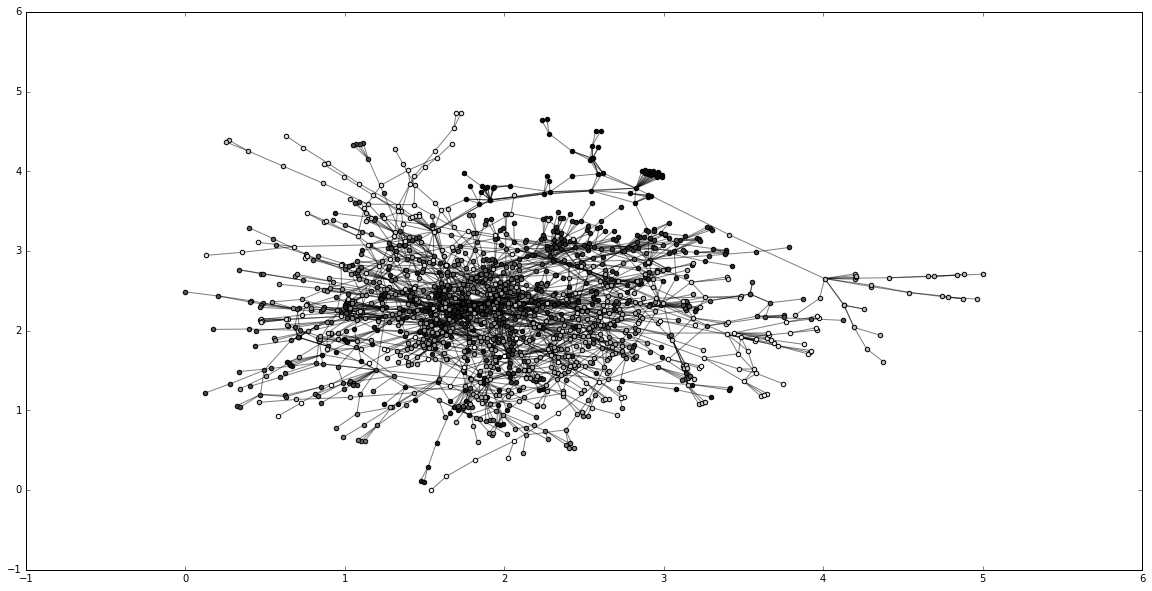

In [33]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

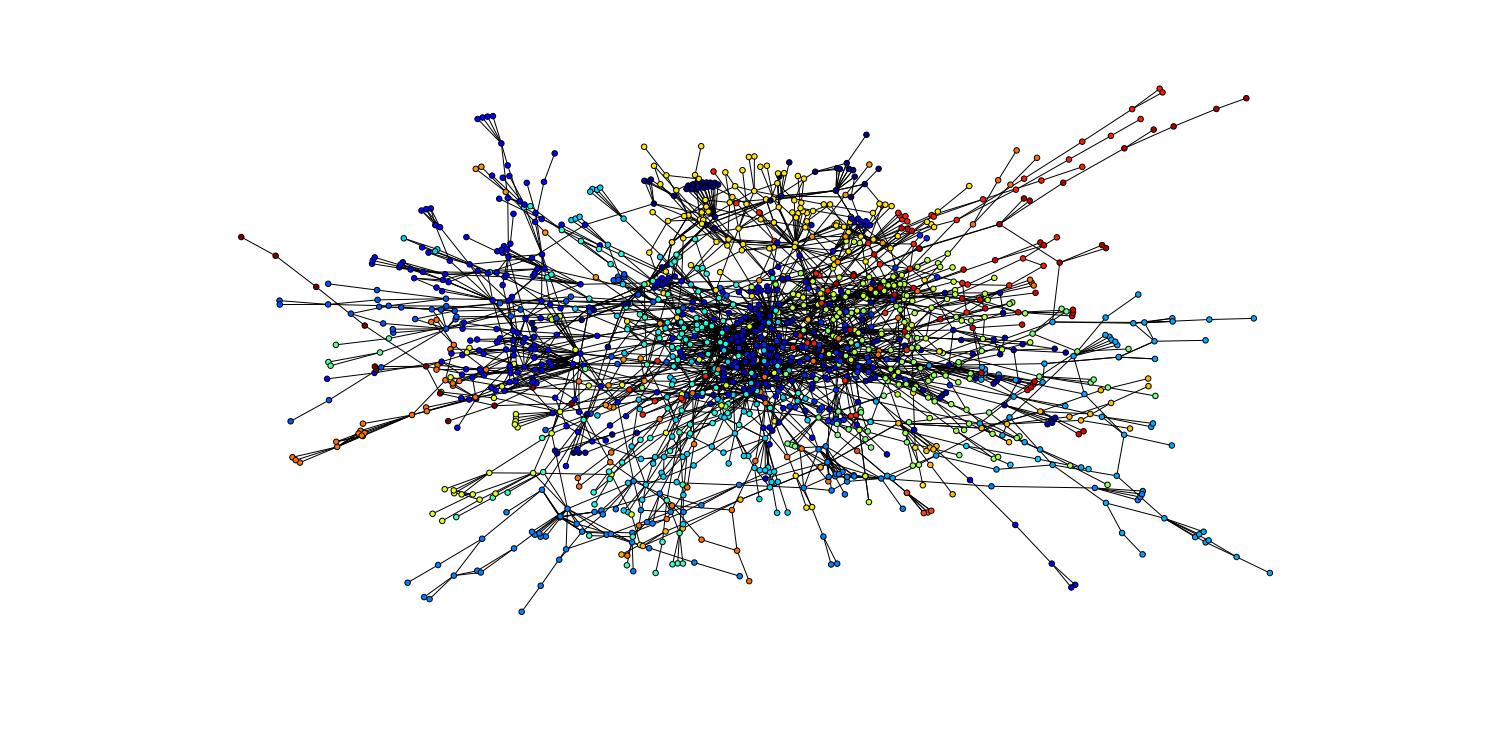

In [34]:
part = community.best_partition(H)
pos=nx.spring_layout(H, scale=5)
values = [part.get(node) for node in H.nodes()]
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [35]:
mod = community.modularity(part,H)
print("modularity:", mod)

('modularity:', 0.8174036792200856)


In [36]:
#shortest paths
shortest_p=nx.shortest_path(G)


In [37]:
#weakly connected
#G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
#giant connected
#H = max(nx.connected_component_subgraphs(H,copy=True), key=len)

In [38]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
#betweenness_centrality_dict = nx.betweenness_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(H)

sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_betweenness_centrality[i][0],sorted_betweenness_centrality[i][1])

The Course named: 01005. 	 Betweenness centrality value is: 0.238445714822.
The Course named: 01901. 	 Betweenness centrality value is: 0.12232961726.
The Course named: 02631. 	 Betweenness centrality value is: 0.106984231465.
The Course named: 02402. 	 Betweenness centrality value is: 0.104214845765.
The Course named: 01035. 	 Betweenness centrality value is: 0.0962992959362.


In [39]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
"""
in_eigen_centrality = nx.eigenvector_centrality(G)
out_eigen_centrality = G.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
"""

'\nin_eigen_centrality = nx.eigenvector_centrality(G)\nout_eigen_centrality = G.reverse()\nout_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)\nsorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)\nsorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)\n'

In [40]:
"""
for i in range(5):
    print "The course name is: %s. \t \t  In-degree Eigenvector centrality value is: %s." %(sorted_in_eigen_centrality[i][0],sorted_in_eigen_centrality[i][1])
"""

'\nfor i in range(5):\n    print "The course name is: %s. \t \t  In-degree Eigenvector centrality value is: %s." %(sorted_in_eigen_centrality[i][0],sorted_in_eigen_centrality[i][1])\n'

In [41]:
"""
for i in range(5):
    print "The course name is: %s. \t \t Out-degree Eigenvector centrality value is: %s." %(sorted_out_eigen_centrality[i][0],sorted_out_eigen_centrality[i][1])
"""

'\nfor i in range(5):\n    print "The course name is: %s. \t \t Out-degree Eigenvector centrality value is: %s." %(sorted_out_eigen_centrality[i][0],sorted_out_eigen_centrality[i][1])\n'

In [42]:
#the shortest path can show which courses you have to have to gain acess to a specific course
shortest_p

{'62581 ': {'62420': ['62581 ', '62420'],
  '62450': ['62581 ', '62450'],
  '62581 ': ['62581 ']},
 '26374': {'26374': ['26374']},
 '42002 ': {'01005': ['42002 ', '01005'], '42002 ': ['42002 ']},
 '02102': {'02102': ['02102']},
 '02100': {'02100': ['02100']},
 '02101': {'02101': ['02101']},
 41737.0: {41737.0: [41737.0],
  '41501': [41737.0, '41501'],
  '41650': [41737.0, '41650']},
 '02105': {'02105': ['02105']},
 41020.0: {41020.0: [41020.0],
  '41010': [41020.0, '41010'],
  '41020': [41020.0, '41020'],
  '42010': [41020.0, '42010'],
  '42021': [41020.0, '42021']},
 '62549 ': {'62402': ['62549 ', '62402'],
  '62432': ['62549 ', '62432'],
  '62549 ': ['62549 ']},
 '11031 ': {'11000': ['11031 ', '11000'],
  '11031 ': ['11031 '],
  '11951': ['11031 ', '11951'],
  '11990': ['11031 ', '11990']},
 41030.0: {41030.0: [41030.0],
  '41020': [41030.0, '41020'],
  '41612': [41030.0, '41612'],
  '42020': [41030.0, '42020'],
  '42612': [41030.0, '42612']},
 41031.0: {41031.0: [41031.0],
  '41010'

In [43]:
#create another with teachers as links

In [44]:
"""
import urllib2
import requests
url='http://kurser.dtu.dk/search?CourseCode=&SearchKeyword=&SchedulePlacement=&Department=41&CourseType=&TeachingLanguage='
req=requests.get(url)
"""

"\nimport urllib2\nimport requests\nurl='http://kurser.dtu.dk/search?CourseCode=&SearchKeyword=&SchedulePlacement=&Department=41&CourseType=&TeachingLanguage='\nreq=requests.get(url)\n"

In [47]:
#from selenium import webdriver
#driver = webdriver.Chrome()